In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
path_lpp = 'https://raw.githubusercontent.com/dsliwka/EEMP2024/refs/heads/main/Data/LPP-CF_1215_v1.csv'

In [ ]:
df = pd.read_csv(path_lpp)
df

,ID_betnr,ID_persnr,welle,branche,ost,size,brekrut_soznetz,bauswahl_interview,bauswahl_ac,bauswahl_kognit,...,mrezip_pos,maltruism,mgesund_allg,mpartner,mpartner_erw,meink_kateg,meink_diff,mkind_anz_gr,mkindu3,mausb
0,1.0,100.0,1.0,3.0,0.0,3.0,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,4.0,NaN,0.0,0.0,3.0
1,1.0,100.0,2.0,3.0,0.0,3.0,1.0,1.0,1.0,0.0,...,2.0,9.0,2.0,1.0,1.0,4.0,200.0,0.0,0.0,3.0
2,1.0,101.0,1.0,3.0,0.0,3.0,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,4.0,NaN,0.0,0.0,1.0
3,1.0,101.0,2.0,3.0,0.0,3.0,1.0,1.0,1.0,0.0,...,1.0,6.0,2.0,1.0,1.0,5.0,650.0,0.0,0.0,1.0
4,1.0,102.0,1.0,3.0,0.0,3.0,1.0,NaN,NaN,NaN,...,NaN,NaN,4.0,1.0,3.0,5.0,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,NaN,978.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,5.0,3.0,1.0,1.0,4.0,0.0,0.0,0.0,1.0
2153,NaN,998.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,9.0,2.0,1.0,2.0,10.0,NaN,1.0,0.0,3.0
2154,NaN,1020.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,8.0,1.0,1.0,2.0,9.0,2200.0,1.0,0.0,1.0
2155,NaN,1042.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,8.0,1.0,1.0,1.0,4.0,896.0,1.0,0.0,1.0


In [ ]:
df.mmagespr.describe()

,mmagespr
count,2154.000000
mean,0.455432
std,0.498125
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<Axes: xlabel='msat_job', ylabel='Count'>

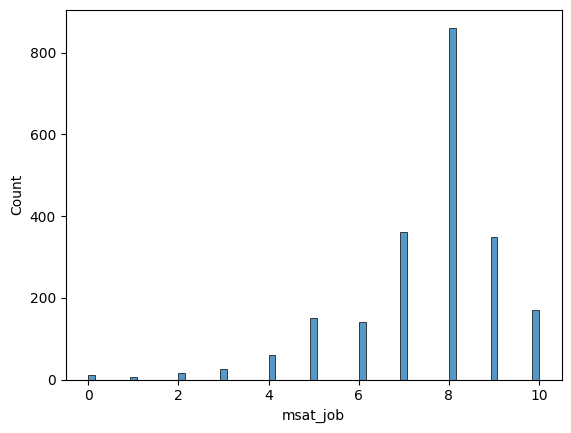

In [ ]:
sns.histplot(df, x='msat_job')

In [ ]:
df.mmagespr.mean()

0.4554317548746518

In [ ]:
# Why is this average different? Because of 3 missing values in the mmagespr variable.
df.mmagespr.sum() / len(df)

0.45479833101529904

In [ ]:
# First remove missing values before dividing the sum by the length
df_no_missing = df.dropna(subset=['mmagespr'])

In [ ]:
df_no_missing.mmagespr.sum() / len(df_no_missing)

0.4554317548746518

In [ ]:
df.groupby(df.mmagespr).msat_job.describe()

,count,mean,std,min,25%,50%,75%,max
mmagespr,,,,,,,,
0.0,1171.0,7.366354,1.783072,0.0,7.0,8.0,8.0,10.0
1.0,981.0,7.737003,1.513931,0.0,7.0,8.0,9.0,10.0


<Axes: xlabel='mmagespr', ylabel='msat_job'>

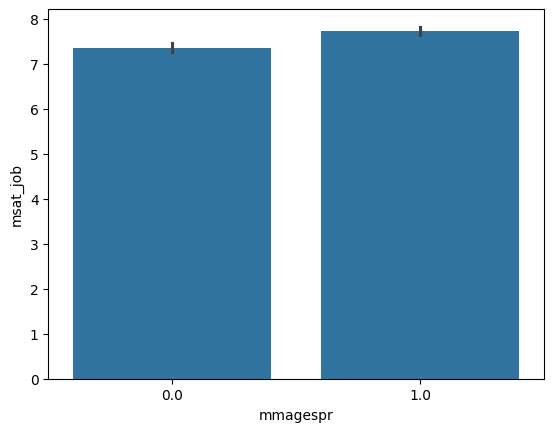

In [ ]:
sns.barplot(df, x='mmagespr', y='msat_job')

In [ ]:
!pip install pyfixest -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 416.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
import pyfixest as pf

In [ ]:
reg1 = pf.feols('msat_job ~ mmagespr', data=df)

In [ ]:
pf.etable(reg1)

GT(_tbl_data=  level_0        level_1                      0
0    coef       mmagespr  0.371*** <br> (0.072)
1    coef      Intercept  7.366*** <br> (0.049)
2   stats   Observations                   2152
3   stats      S.E. type                    iid
4   stats  R<sup>2</sup>                  0.012, _body=<great_tables._gt_data.Body object at 0x7d5b00702980>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7d5b00703520>, _spanners=Spanners([SpannerInfo(spanner_id='msat_job', spanner_level=1, spanner_label='msat_job', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[''], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7d5b00703be0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', valu

In [ ]:
reg2 = pf.feols('msat_job ~ mmagespr + alter + mleitung + mbef + maz_voll_teil + mheim + mwb', data=df)

In [ ]:
pf.etable([reg1, reg2])

GT(_tbl_data=   level_0        level_1                      0                      1
0     coef       mmagespr  0.371*** <br> (0.072)  0.339*** <br> (0.075)
1     coef          alter                          0.012** <br> (0.004)
2     coef       mleitung                            0.003 <br> (0.081)
3     coef           mbef                           -0.128 <br> (0.194)
4     coef  maz_voll_teil                           -0.102 <br> (0.106)
5     coef          mheim                           -0.068 <br> (0.100)
6     coef            mwb                          0.231** <br> (0.077)
7     coef      Intercept  7.366*** <br> (0.049)  6.731*** <br> (0.201)
8    stats   Observations                   2152                   2145
9    stats      S.E. type                    iid                    iid
10   stats  R<sup>2</sup>                  0.012                  0.021, _body=<great_tables._gt_data.Body object at 0x7d5b007c2890>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7d5b007c0d90>, _spanners=Spanners([SpannerInfo(spanner_id='msat_job', spanner_level=1, spanner_label='msat_job', spanner_units=None, spanner_pattern=None, vars=['0', '1'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[''], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7d5b007c3dc0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, categor

In [ ]:
labels = {
    "mmagespr": "Feedback interviews",
    "alter": "Age",
    "mleitung": "Manager",
    "mbef": "Temporary contract",
    "maz_voll_teil": "Part time work",
    "mheim": "Working from home",
    "mwb": "Training"
}

pf.etable([reg1, reg2], labels=labels)

GT(_tbl_data=   level_0              level_1                      0                      1
0     coef  Feedback interviews  0.371*** <br> (0.072)  0.339*** <br> (0.075)
1     coef                  Age                          0.012** <br> (0.004)
2     coef              Manager                            0.003 <br> (0.081)
3     coef   Temporary contract                           -0.128 <br> (0.194)
4     coef       Part time work                           -0.102 <br> (0.106)
5     coef    Working from home                           -0.068 <br> (0.100)
6     coef             Training                          0.231** <br> (0.077)
7     coef            Intercept  7.366*** <br> (0.049)  6.731*** <br> (0.201)
8    stats         Observations                   2152                   2145
9    stats            S.E. type                    iid                    iid
10   stats        R<sup>2</sup>                  0.012                  0.021, _body=<great_tables._gt_data.Body object at 0x7d5b005f9450>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7d5b005f8910>, _spanners=Spanners([SpannerInfo(spanner_id='msat_job', spanner_level=1, spanner_label='msat_job', spanner_units=None, spanner_pattern=None, vars=['0', '1'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=[''], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7d5b005f9480>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value